# Comparison of random forest, logistic regression and xgboost model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

import sklearn.metrics as metrics
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression

### Random seed to ensure reproductible runs

In [2]:
RSEED = 50

### Set up colorbar

In [3]:
cmap = mpl.cm.get_cmap('BrBG')

# Random forest

In [4]:
df_main = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/df_modelling.csv', index_col='rgiid')
df_main.columns

/home/colili/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['x', 'y', 'Surge', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'Area',
       'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Status', 'Connect',
       'Form', 'TermType', 'Linkages', 'Name', 'check_geom', 'geometry', 'bed',
       'thickness', 'surface_elevation', 'width_centerline', 'Runoff', 'ELA',
       'beta', 'cmb', 'Bed_slope', 'Surface_slope', 'WHsin', 'WH', 'dummy',
       'SMB_calc'],
      dtype='object')

In [5]:
df_main

,x,y,Surge,BgnDate,EndDate,CenLon,CenLat,Area,Zmin,Zmax,...,Runoff,ELA,beta,cmb,Bed_slope,Surface_slope,WHsin,WH,dummy,SMB_calc
rgiid,,,,,,,,,,,,,,,,,,,,,
RGI60-07.00004,524634.335707,8.539882e+06,0,20080901,-9999999,15.9932,76.9423,1.044,665,933,...,1.110227,431.471268,0.005068,1.388794,NaN,NaN,NaN,NaN,0.726012,NaN
RGI60-07.00004,524633.930457,8.539906e+06,0,20080901,-9999999,15.9932,76.9423,1.044,665,933,...,1.105706,431.784498,0.005069,1.394411,NaN,NaN,NaN,NaN,0.970469,NaN
RGI60-07.00004,524657.521964,8.539931e+06,0,20080901,-9999999,15.9932,76.9423,1.044,665,933,...,1.100061,432.103017,0.005069,1.392706,NaN,NaN,NaN,0.090480,0.945853,2.447634
RGI60-07.00004,524681.113471,8.539955e+06,0,20080901,-9999999,15.9932,76.9423,1.044,665,933,...,1.094416,432.421537,0.005068,1.391001,12.654898,3.372262,809.523242,0.104519,0.807044,2.435692
RGI60-07.00004,524704.704977,8.539980e+06,0,20080901,-9999999,15.9932,76.9423,1.044,665,933,...,1.088771,432.740057,0.005068,1.389296,12.654898,3.372262,904.899185,0.093502,0.309744,2.433887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-07.01567,534310.362510,8.675249e+06,3,20040713,-9999999,16.5502,78.1217,5.350,304,970,...,2.127417,627.625366,0.004614,-1.423469,4.401905,7.893963,-11421.363223,0.181951,0.236503,-1.604864
RGI60-07.01567,534309.250485,8.675291e+06,3,20040713,-9999999,16.5502,78.1217,5.350,304,970,...,2.076787,627.625366,0.004618,-1.395654,4.401905,7.893963,-10608.299012,0.195897,0.093612,-1.606379
RGI60-07.01567,534308.138459,8.675333e+06,3,20040713,-9999999,16.5502,78.1217,5.350,304,970,...,2.005969,627.625366,0.004620,-1.382369,-0.158243,-0.761801,-1682.075458,0.208355,0.176144,-1.604294


In [6]:
df_main.drop(df_main[df_main['Surge']==9].index, inplace = True)
df_main.drop(df_main[df_main['Surge']==1].index, inplace = True)
# df_main.drop(df_main[df_main['Surge']==2].index, inplace = True)
# df = df_main.drop(columns = ['Unnamed: 0','x', 'y', 'ELA', 'beta', 'Name', 'Area'])
df = df_main.drop(columns = ['x', 'y', 'BgnDate', 'EndDate', 'CenLon', 'CenLat', 'Area',
       'Zmin', 'Zmax', 'Zmed', 'Aspect', 'Lmax', 'Status', 'Connect',
       'Form', 'Linkages', 'Name', 'check_geom', 'geometry', 'ELA', 'beta',
        'Bed_slope', 'Surface_slope', 'cmb'])
df.dropna(how='any', inplace=True)
df

,Surge,Slope,TermType,bed,thickness,surface_elevation,width_centerline,Runoff,WHsin,WH,dummy,SMB_calc
rgiid,,,,,,,,,,,,
RGI60-07.00004,0,13.8,0,882.06460,30.935455,913.00000,295.980219,1.094416,809.523242,0.104519,0.807044,2.435692
RGI60-07.00004,0,13.8,0,882.06460,30.935455,913.00000,330.851846,1.088771,904.899185,0.093502,0.309744,2.433887
RGI60-07.00004,0,13.8,0,882.06460,30.935455,913.00000,342.886985,1.083127,937.815996,0.090221,0.810271,2.432082
RGI60-07.00004,0,13.8,0,881.31860,34.681380,916.00000,336.403639,1.077530,11104.786522,0.103095,0.264539,2.445479
RGI60-07.00004,0,13.8,0,874.88640,35.113590,910.00000,330.094736,1.081518,7510.436075,0.106374,0.822424,2.414392
...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-07.01567,3,11.7,0,237.64468,50.380424,288.02512,278.553621,2.123592,-8877.735508,0.180864,0.732077,-1.566323
RGI60-07.01567,3,11.7,0,233.07228,46.717087,279.78937,256.755923,2.127417,-11421.363223,0.181951,0.236503,-1.604864
RGI60-07.01567,3,11.7,0,233.07228,46.717087,279.78937,238.477978,2.076787,-10608.299012,0.195897,0.093612,-1.606379


In [7]:
df.groupby('Surge').count()

,Slope,TermType,bed,thickness,surface_elevation,width_centerline,Runoff,WHsin,WH,dummy,SMB_calc
Surge,,,,,,,,,,,
0,66717,66717,66717,66717,66717,66717,66717,66717,66717,66717,66717
2,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195,4195
3,10744,10744,10744,10744,10744,10744,10744,10744,10744,10744,10744


In [8]:
df['Surge'] = df['Surge'].replace({2: 1, 3: 1})
df = df.loc[df['Surge'].isin([0, 1])].copy()
df = df.rename(columns = {'Surge': 'label'})
df['label'].value_counts()

0    66717
1    14939
Name: label, dtype: int64

# Split in test/train

In [9]:
# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

## Evaluation of the decision tree function

In [10]:
def evaluate_model(predictions, probs, train_predictions, train_probs, color):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    
    plt.figure(figsize = (8, 8))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'k', label = 'baseline')
    plt.plot(model_fpr, model_tpr, color, label = 'model')
    plt.text(s = 'AUC = ' + str(round(roc_auc_score(train_labels, train_probs),2))
    , x=0.6, y=0.0, fontsize=15
)
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

## Confusion matrix function

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    cbar = plt.colorbar(aspect=4)
    plt.clim(0,100)
    cbar.set_label('Fraction (%)')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
#                  color="black" if cm[i, j] > thresh else "white")
                 color="black")

        
#    plt.grid(None)
#    plt.tight_layout()
#    plt.ylabel('True label', size = 18)
#    plt.xlabel('Predicted label', size = 18)

# Random forest modelling

In [12]:
model = RandomForestClassifier(n_estimators=1000, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               max_depth = 2,
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=1000,
                       n_jobs=-1, random_state=50, verbose=1)

### Evaluation of the random forest

In [13]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 7
Average maximum depth 2


In [14]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Paral

In [15]:
pd.DataFrame({'true':test_labels, 'predictions':rf_predictions, 'probs':rf_probs}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF_raw.csv')

In [16]:
pd.DataFrame({'true':train_labels, 'predictions':train_rf_predictions, 'probs':train_rf_probs}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_RF_raw_train.csv')

Recall Baseline: 1.0 Test: 0.07 Train: 0.07
Precision Baseline: 0.18 Test: 0.87 Train: 0.85
Roc Baseline: 0.5 Test: 0.8 Train: 0.8


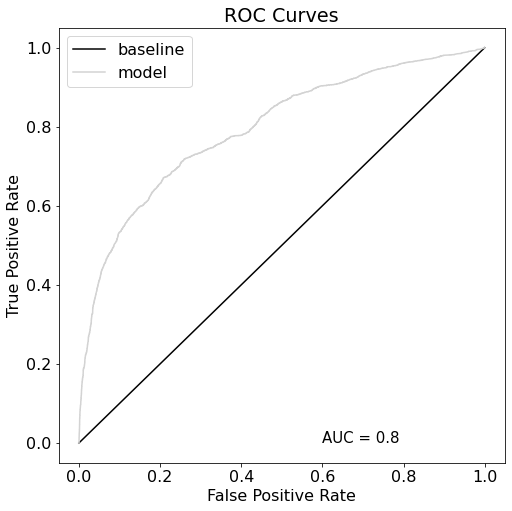

In [17]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, 'lightgray')

Confusion matrix, without normalization
[[82  0]
 [17  1]]


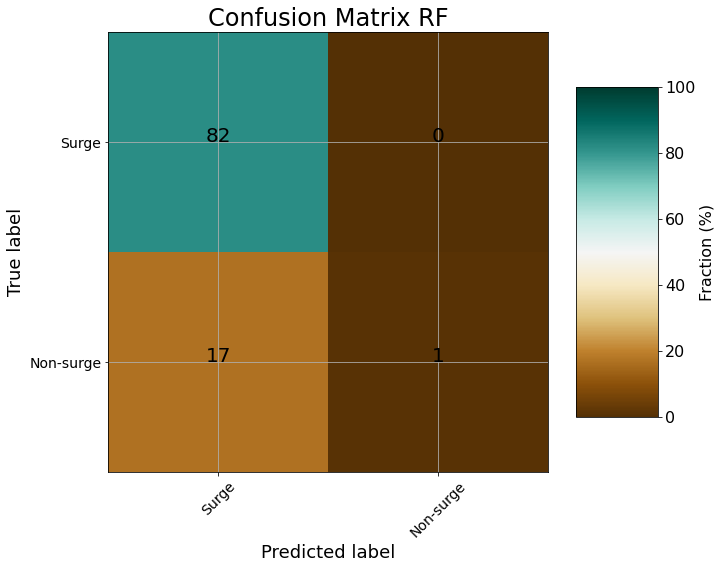

In [45]:
cm_rf = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(np.round(cm_rf/(test_labels.shape)*100).astype(int), classes = ['Surge', 'Non-surge'],
                      title = 'Confusion Matrix RF', cmap='BrBG')

In [19]:
average_precision_rf = average_precision_score(test_labels, rf_predictions)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_rf))

Average precision-recall score: 0.23


In [20]:
# disp_rf = plot_precision_recall_curve(model, test, test_labels, 'grey')
# disp_rf.ax_.set_title('2-class Precision-Recall curve RF: '
#                    'AP={0:0.2f}'.format(average_precision_rf))

In [21]:
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 3491 nodes with maximum depth 26.


In [22]:
# Features for feature importances
features = list(train.columns)
features

fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
0,Slope,0.299076
5,width_centerline,0.171143
6,Runoff,0.109788
3,thickness,0.096857
10,SMB_calc,0.088408


# Logistic regression

In [23]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)

LogisticRegression()

In [24]:
predictions_LR = logreg.predict(test)
probs_LR = logreg.predict_proba(test)[:, 1]

predictions_LR_train = logreg.predict(train)
probs_LR_train = logreg.predict_proba(train)[:, 1]
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test, test_labels)))

Accuracy of logistic regression classifier on test set: 0.82


In [25]:
pd.DataFrame({'true':test_labels, 'predictions':predictions_LR, 'prob':probs_LR}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR_raw.csv')

In [26]:
pd.DataFrame({'true':train_labels, 'predictions':predictions_LR_train, 'prob':probs_LR_train}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_evaluation_LR_raw_train.csv')

In [27]:
cmap(0)

(0.32941176470588235, 0.18823529411764706, 0.0196078431372549, 1.0)

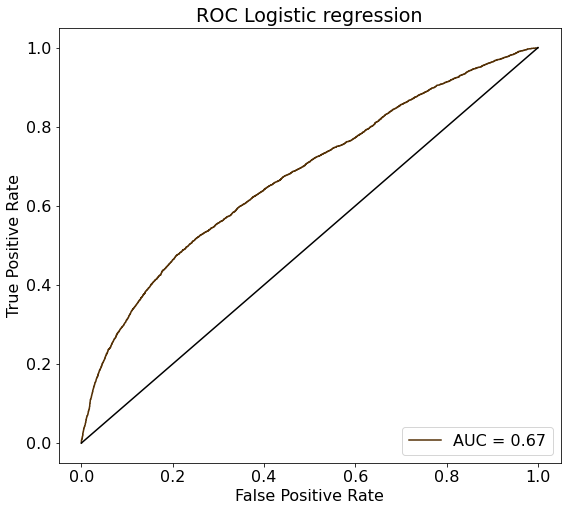

In [28]:
logit_roc_auc = roc_auc_score(test_labels, logreg.predict_proba(test)[:,1])
fpr, tpr, thresholds = roc_curve(test_labels, logreg.predict_proba(test)[:,1])
plt.figure(figsize=(9, 8))
plt.plot(fpr, tpr, color=cmap(0), label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k')
# # plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Logistic regression')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

<function confusion_matrix at 0x7f5032149790>
Confusion matrix, without normalization
[[78  3]
 [15  3]]


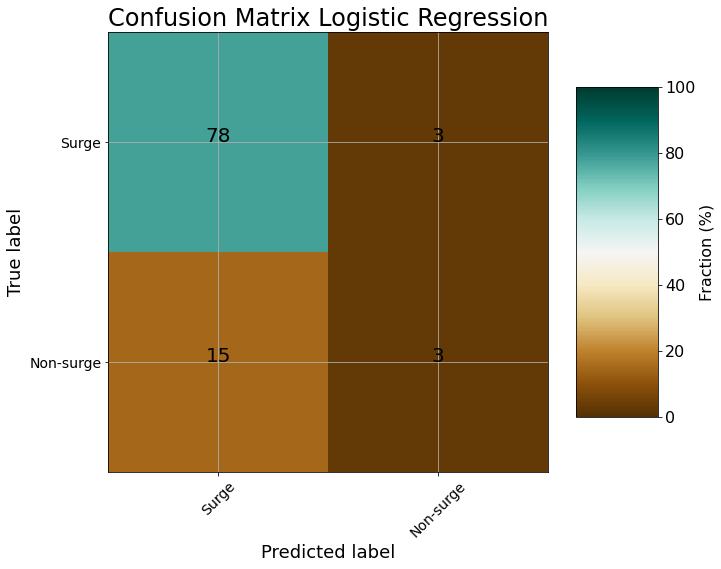

In [29]:
cm_LR = confusion_matrix(test_labels, predictions_LR)
print(confusion_matrix)
plot_confusion_matrix((cm_LR/test_labels.shape*100).astype(int), classes = ['Surge', 'Non-surge'],
                      title = 'Confusion Matrix Logistic Regression', cmap='BrBG')

In [30]:
average_precision_LR = average_precision_score(test_labels, predictions_LR)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_LR))

Average precision-recall score: 0.24


Text(0.5, 1.0, '2-class Precision-Recall curve RF: AP=0.24')

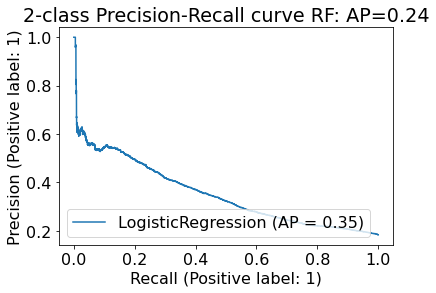

In [31]:
disp_lr = plot_precision_recall_curve(logreg, test, test_labels)
disp_lr.ax_.set_title('2-class Precision-Recall curve RF: '
                   'AP={0:0.2f}'.format(average_precision_LR))

# Gradient boosted

In [32]:
dmatrix_train = xgboost.DMatrix(train, label=train_labels)
dmatrix_test = xgboost.DMatrix(test, label=test_labels)

In [33]:
trainprob = train.copy()
trainprob['y'] = train_labels

trainprob.corr()

,Slope,TermType,bed,thickness,surface_elevation,width_centerline,Runoff,WHsin,WH,dummy,SMB_calc,y
Slope,1.000000,-0.200386,0.412799,-0.506693,0.248780,-0.354571,-0.138672,-0.038013,-0.067776,0.000402,0.131200,-0.308218
TermType,-0.200386,1.000000,-0.292667,0.414817,-0.154584,0.318486,0.126234,0.062134,-0.063286,-0.012003,-0.065356,0.299070
bed,0.412799,-0.292667,1.000000,-0.386866,0.932320,-0.213301,-0.600858,-0.031039,-0.141711,0.001171,0.747199,-0.222419
thickness,-0.506693,0.414817,-0.386866,1.000000,-0.027208,0.526193,-0.057502,0.094029,0.168242,-0.004582,0.076886,0.285303
surface_elevation,0.248780,-0.154584,0.932320,-0.027208,1.000000,-0.024869,-0.673902,0.003228,-0.087640,-0.000528,0.840143,-0.129224
width_centerline,-0.354571,0.318486,-0.213301,0.526193,-0.024869,1.000000,-0.104613,0.145911,-0.199387,-0.002493,0.106785,0.221854
Runoff,-0.138672,0.126234,-0.600858,-0.057502,-0.673902,-0.104613,1.000000,-0.024620,-0.000878,0.001336,-0.676500,0.179434
WHsin,-0.038013,0.062134,-0.031039,0.094029,0.003228,0.145911,-0.024620,1.000000,-0.016088,0.002903,0.018444,0.037908
WH,-0.067776,-0.063286,-0.141711,0.168242,-0.087640,-0.199387,-0.000878,-0.016088,1.000000,0.005056,-0.084490,-0.031858
dummy,0.000402,-0.012003,0.001171,-0.004582,-0.000528,-0.002493,0.001336,0.002903,0.005056,1.000000,-0.002757,0.001878


In [34]:
params = {'objective':'reg:logistic', 'num_boost_round':20000, 'max_depth':1, 'scale_pos_weight':0.5}

xgb = xgboost.train(params, dmatrix_train, num_boost_round=20000)

[18:04:28] WARNING: ../src/learner.cc:573: 
Parameters: { "num_boost_round" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [35]:
predictions_xgboost = xgb.predict(dmatrix_test)
predictions_xgboost_train = xgb.predict(dmatrix_train)

In [36]:
pd.DataFrame({'true':test_labels, 'predictions':predictions_xgboost}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost_raw.csv')

In [37]:
pd.DataFrame({'true':train_labels, 'predictions':predictions_xgboost_train}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced_clean/ROC_curve/df_eval_xgboost_raw_train.csv')

Text(0.6, 0.0, 'AUC = 0.89')

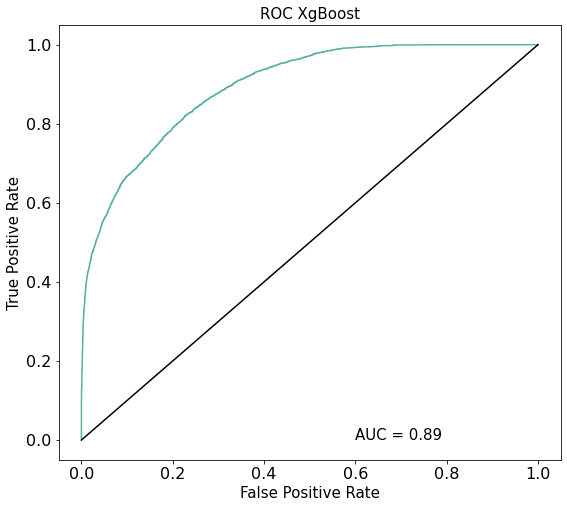

In [38]:
fpr, tpr, t = metrics.roc_curve(y_true=test_labels, y_score=predictions_xgboost)

fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(fpr, tpr, color=cmap(0.75))
ax.plot([0, 1], [0, 1], 'k')

ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_title('ROC XgBoost', fontsize=15)
ax.text(
s = 'AUC = ' + str(round(metrics.roc_auc_score(y_true=test_labels, y_score=predictions_xgboost),2))
    , x=0.6, y=0.0, fontsize=15
)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

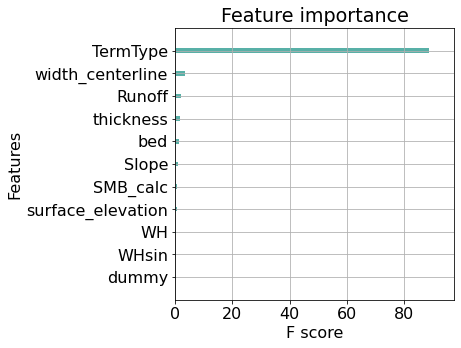

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
xgboost.plot_importance(xgb, importance_type = 'gain', show_values=False, ax=ax, color=cmap(0.75))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

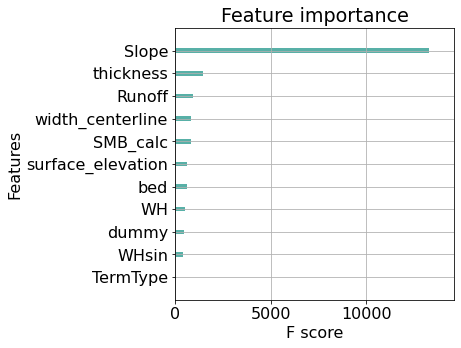

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
xgboost.plot_importance(xgb, importance_type = 'weight', show_values=False, ax=ax, color=cmap(0.75))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

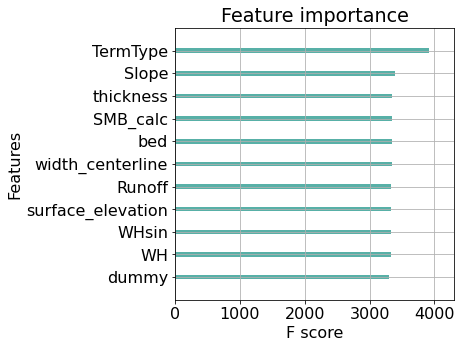

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))
xgboost.plot_importance(xgb, importance_type = 'cover', show_values=False, ax=ax, color=cmap(0.75))

In [42]:
average_precision_xgboost = average_precision_score(test_labels, predictions_xgboost)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_xgboost))

Average precision-recall score: 0.73


Confusion matrix, without normalization
[[81  0]
 [11  6]]


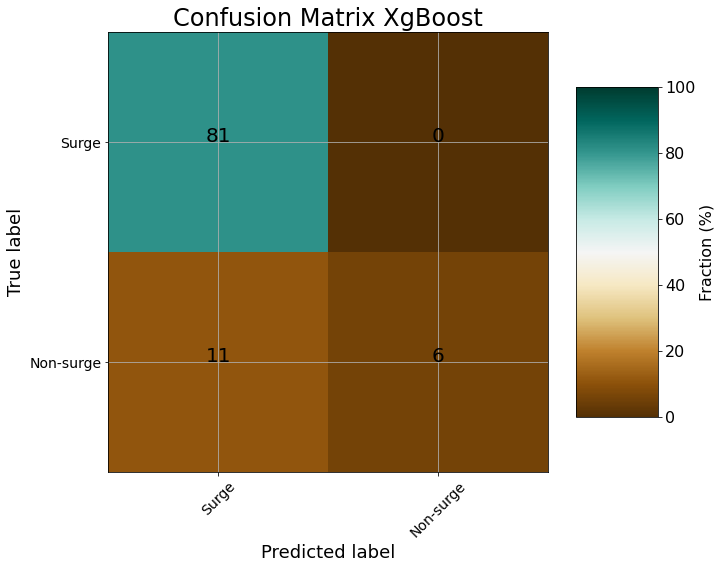

In [44]:
# confusion_matrix(test_labels, predictions.round())
cm_xgboost = confusion_matrix(test_labels, predictions_xgboost.round())
plot_confusion_matrix((cm_xgboost/test_labels.shape*100).astype(int), classes = ['Surge', 'Non-surge'],
                      title = 'Confusion Matrix XgBoost', cmap='BrBG')

In [71]:
def plot_confusion_matrix(ax, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title, size = 24)
    cbar = ax.colorbar(aspect=4)
#    ax.set_clim(0,100)
    cbar.set_label('Fraction (%)')
    cbar.set_clim(0, 100)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, classes)
    ax.set_yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
#                  color="black" if cm[i, j] > thresh else "white")
                 color="black")

        
#    plt.grid(None)
#    plt.tight_layout()
#    plt.ylabel('True label', size = 18)
#    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[81  0]
 [11  6]]


AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

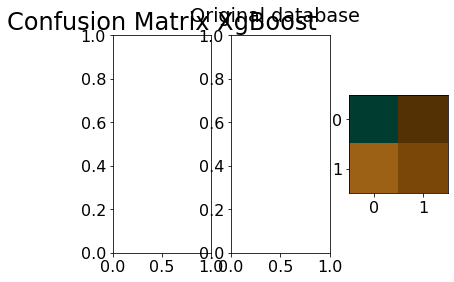

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Original database')
plot_confusion_matrix(ax1, (cm_xgboost/test_labels.shape*100).astype(int), classes = ['Surge', 'Non-surge'],
                      title = 'Confusion Matrix XgBoost', cmap='BrBG')
#ax2.plot(x, -y)